## Titanic survival rate regressor
* EDA
* Training
* Evaluation

In [282]:
from platform import python_version
print(f'python version: {python_version()}')

python version: 3.8.3


In [283]:
import os
print(f'cwd: {os.getcwd()}')

cwd: /Users/sunshah/Workspace/prototype/ML/notebooks/Kaggle


In [425]:
# data analysis + wrangling
import pandas as pd
import numpy as np
import random as rnd
from pandas import DataFrame

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

# misc
import math

### Acquire and Observe the data

In [285]:
train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')

print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [286]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Categorical, Ordinal, Interval values
* Categorical values AKA nominal values have two or more categories with no particular ordering e.g gender(male, female), hair color (brown, black, brunette etc) 
* Ordinal - smilar to categorial but there is clear ordering between the categories e.g economic status (low, medium, high), eduction level (elementary, high school, under graduate, post graduate). These categories have a clear order however the difference between the categories isn't clearly defined e.g elementary vs high school is greater than under graduate and graduate school
* Intervals are like ordinal with clear ordering between the categories with clearly defined intervals e.g income range (5000, 10000, 15,000, 20,000)

*Survived, Sex, Embarked: categorical* 

*Pclass: ordinal*

### Numerical values
*Age, SibSp, Parch, Fare*

### Mixed Data Types

*Ticket and Cabin contain alpha numeric characters - can these be corrected?* 

## Which fields contain/can contain null fields? 
Use DataFrame `info()` to get summary of columns

In [287]:
train.info()
print('='*50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

### Train Dataset
`Cabin`, `Age` and `Embarked` columns have missing data in that order

### Test Dataset
`Cabin`, `Age` are incomplete in the test set

## Data Types of Each Feature

### object
 * Name
 * Sex
 * Ticket
 * Cabin
 * Embarked
 
### int 
 * PassengerId
 * Pclass
 * SibSp
 * Parch

### float
 * Age
 * Fare

In [288]:
# use value counts to get 
print(f'Sex value counts \n{train.Sex.value_counts()}')
print('-'*50)
print(f'Cabin value counts \n{train.Cabin.value_counts()}')
print('-'*50)
print(f'Embarked value counts \n{train.Embarked.value_counts()}')
print('-'*50)
print(f'Pclass value counts \n{train.Pclass.value_counts()}')
print('-'*50)
print(f'Sibling/Spouce value counts \n{train.SibSp.value_counts()}')
print('-'*50)
print(f'Parent/Children value counts \n{train.Parch.value_counts()}')
print('-'*50)
print(f'Age value counts \n{train.Age.value_counts()}')
print('-'*50)
print(f'Fare value counts \n{train.Fare.value_counts()}')

Sex value counts 
male      577
female    314
Name: Sex, dtype: int64
--------------------------------------------------
Cabin value counts 
G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
E101           3
              ..
A6             1
E34            1
B82 B84        1
C90            1
E50            1
Name: Cabin, Length: 147, dtype: int64
--------------------------------------------------
Embarked value counts 
S    644
C    168
Q     77
Name: Embarked, dtype: int64
--------------------------------------------------
Pclass value counts 
3    491
1    216
2    184
Name: Pclass, dtype: int64
--------------------------------------------------
Sibling/Spouce value counts 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
--------------------------------------------------
Parent/Children value counts 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
--------------------------------------

## Explore the distribution of numerical values across samples

In [289]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Survived
    * 38.3 % survived in the training set (actual was 32)*
    * Categorical feature of 0/1

### Pclass
    * Only 25% or less were class 1 or 2. Most were class 3 passengers

### Age
    * Age has null values: count = 714 as compared to 891 *
    * Age range: 5 months - 80, 75% were 38 or less years in age
    
### SibSp
    * 75% of the passengers were travelling with no sibling or spouse
    
### Parch
    * less than 25% of the passengers were travelling with children/parents

### Fare
    * 75% of passengers paid < $31, 50% paid < $15 as their fare*

In [290]:
figsize = (10, 6)
plot_kwargs = {
    "figsize": figsize,
    "grid":True,
    "density": True,
    "stacked": False
}

[Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Age Distribution Density')]

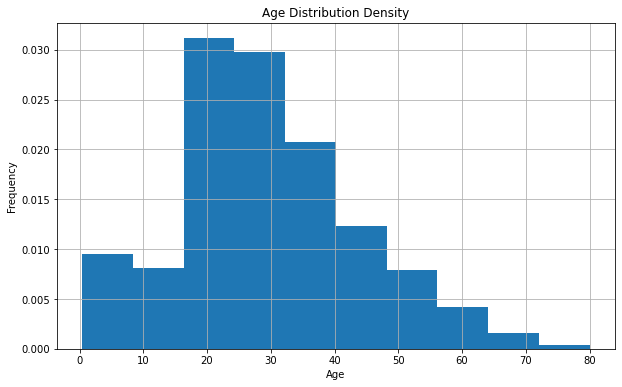

In [291]:
# Age distribution
age = train['Age']
ax = age.plot(kind='hist', **plot_kwargs )
ax.set( title='Age Distribution Density', xlabel='Age')

* age ranges from 0 - 80 (oldest passenger)*
* most were between 20-40 years old*

[Text(0.5, 0, 'Fare'), Text(0.5, 1.0, 'Fare Distribution Density')]

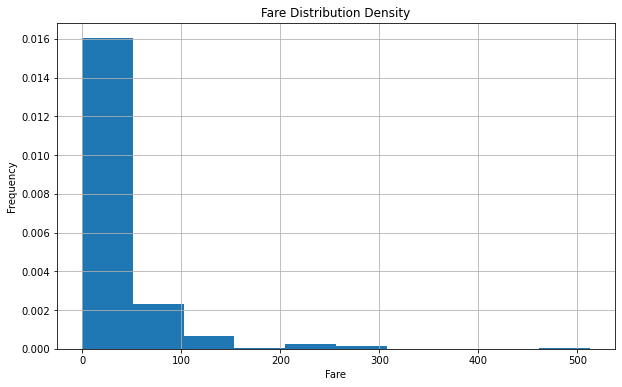

In [292]:
fare = train['Fare']
ax = fare.plot(kind='hist', **plot_kwargs)
ax.set(xlabel='Fare', title='Fare Distribution Density')

* most folks paid under $50 for their tickets

* most expensive ticket was $500

### Non numeric variables

In [293]:
# describe object ('O') - non-numeric columns
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goodwin, Mr. Charles Edward",male,CA. 2343,G6,S
freq,1,577,7,4,644


### Name
    * All names are unique
### Sex
    * Mostly male 577/891
### Ticket
    * High ratio of duplicates 23.5% (210/891) 
### Cabin
    * Cabin has duplicates (57/204), possibly indicating shared cabins
    * Cabin data is limited (204/891), lots of missing values
### Embarked
    * 3 possible embarked locations, most from port S

## Assumptions based on Analysis

### Correlation
 * Determine which features correlate to survival and match these with modelled correlations later on

### Completing
 * Age should affect survivability, we should complete the missing values
 * Embarked location may indicate wealth hence class of ticket purchased. Higher the class better the chances of survival
 
### Correcting
 * Name and PassengerId won't have correlation to survival - drop it
 * Ticket has high ratio of duplicates - drop it
 * Cabin information is incomplete - drop it
 
### Creating
 * We may want to create a new feature called family size by combinin SibSp and Parch
 * Possible extract title (Sir, Dr., Lord) from Name indicating ticket class
 * Create age bands to convert age from continuous to categorical values
 * Create fare ranges too 
 
### Classifying
* Women (gender) were more likely to have survived
* Childre/babies (age) were more likely to have survived
* Wealthier people (class) were more likely to have survived

## Confirming Assumptions

### Pclass and Survived

In [294]:
HEIGHT=5

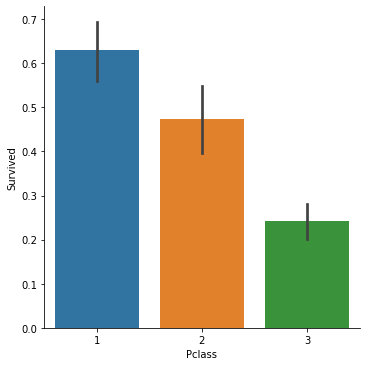

In [295]:
ax = sns.catplot(x='Pclass', y='Survived', data=train, kind='bar', height=HEIGHT)

In [296]:
# Pivot by passenger class and get aggregate - mean
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#### Observation
    * Signification correlation between passenger class and survial rate

###  Sex and Survived

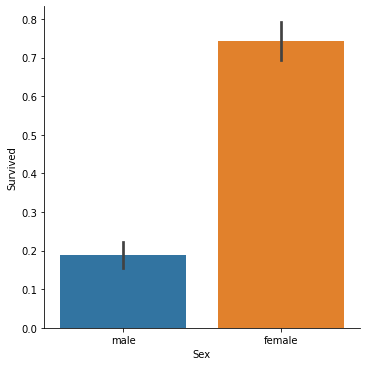

In [297]:
ax = sns.catplot(x='Sex', y='Survived', data=train, kind='bar', height=HEIGHT)

In [298]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


#### Observation
    * You are almost 3 times as likely to survive if you are female - strong correlation

### Sibling/Spouse, Parent/Child and Survived

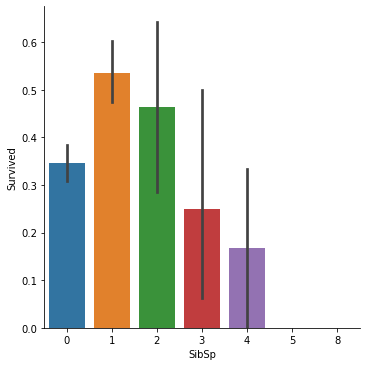

In [299]:
ax = sns.catplot(x='SibSp', y='Survived', data=train, kind='bar', height=HEIGHT)

In [300]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


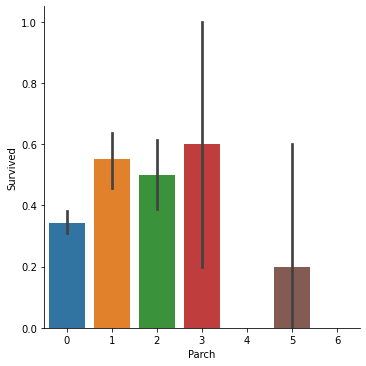

In [301]:
ax = sns.catplot(x='Parch', y='Survived', data=train, kind='bar', height=HEIGHT)

In [302]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


#### Observation
    * There doesn't seem to be a clear relationship between familial relationship and survivability
    * We may want to combine them to a single variable 

### Age and Survived
Histogram is great for visualizing continuous data. Banding or ranges will help identify patterns if any. 
`FacetGrid` are excellent for plotting interactions between multiple variables

In [303]:
print(sns.__version__)

0.11.1


/Users/sunshah/miniconda/envs/ecommerce/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/sunshah/miniconda/envs/ecommerce/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


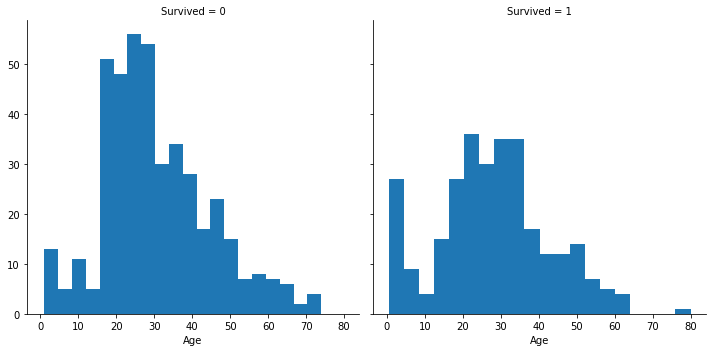

In [304]:
# create facet grid on target variable - Survived
grid = sns.FacetGrid(train, col='Survived', height=HEIGHT)
# create a histogram of variable - Age and plot 
ax = grid.map(plt.hist, 'Age', bins=20)

#### Observation
    * Infants (0-3 years) had the high survival rate
    * Highest number of casulties were in the 20-30 age range
    * Oldest passenger to survive was 80
    * Most passengers are in the 15-40 range

### Pclass, Age and Survived

Did passengers from a certain ticket class have a better chance of survival? Did age play a factor within the classes?

Histogram Facet grid of categorical features with numerical values can help visualize this.

/Users/sunshah/miniconda/envs/ecommerce/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/sunshah/miniconda/envs/ecommerce/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


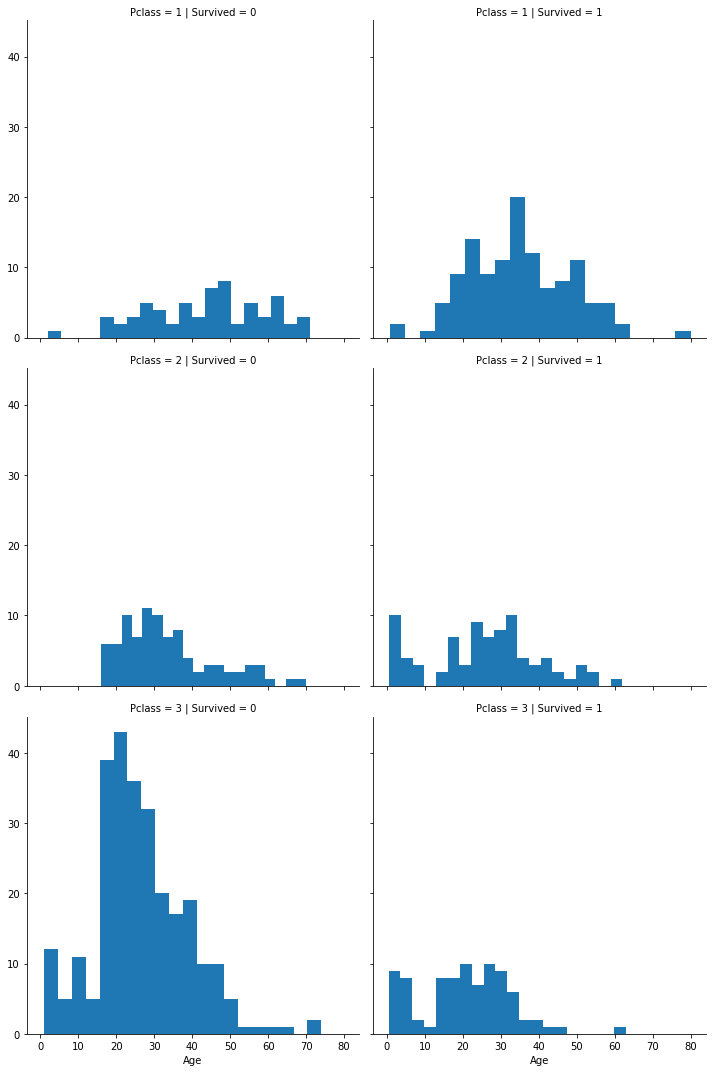

In [305]:
grid_pclass = sns.FacetGrid(train, col='Survived', row='Pclass', height=HEIGHT)
ax = grid_pclass.map(plt.hist, 'Age', bins=20)
# pclass_facet_grid.add_legend()

#### Observation
    * Passernger class 1 had the highest survival rate across all age ranges
    * Almost all infants and children in Pclass 2 survived
    * Pclass 3 had the highest death rate across all age ranges
    
#### Decision
    * Age seems to play a role in survival
    * Fill in missing values (null) for age
    * Band age ranges to create new feature

### Embarked and Survived
How did port of boarding affect survival? 

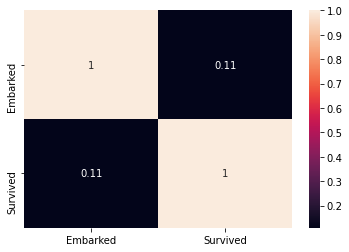

In [306]:
embarked_categorical = train[['Embarked', 'Survived']].replace(['S', 'C', 'Q'], [1, 2, 3])
ax = sns.heatmap(embarked_categorical.corr(), annot=True)

#### Observation
    * Not very strong, but correlation between survived and embarked is present (0.11)
    
#### Decision
    * Complete missing values for embarked and use it in the model

### Fare and Survived

/Users/sunshah/miniconda/envs/ecommerce/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


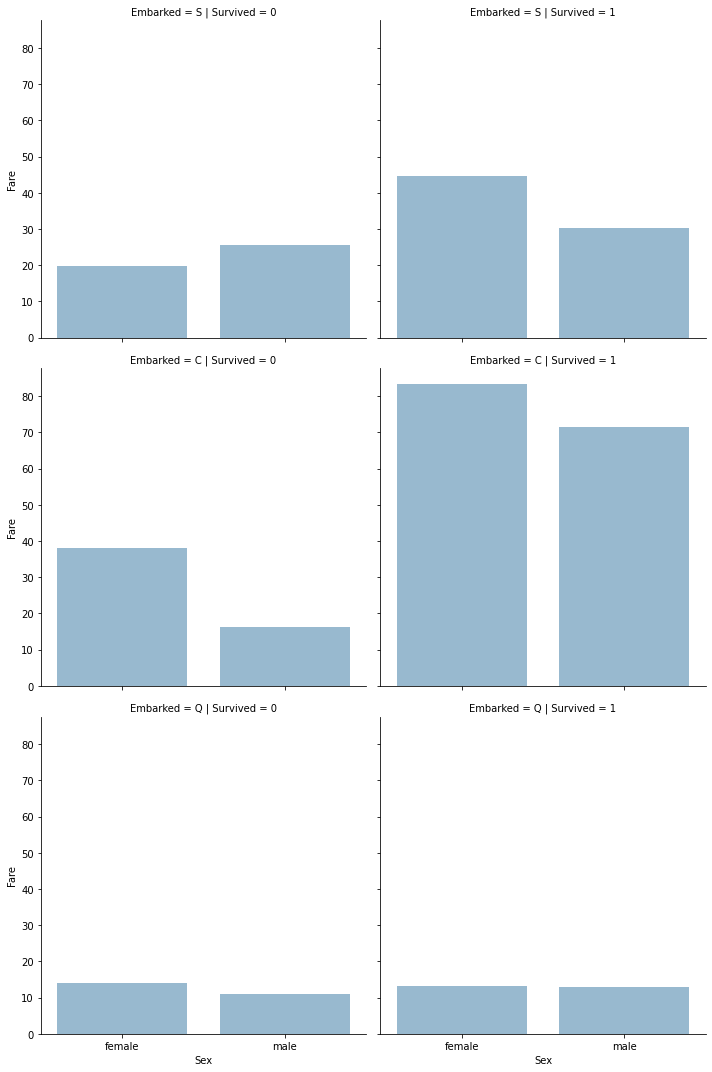

In [307]:
fare_grid = sns.FacetGrid(train, col='Survived', row='Embarked', height=HEIGHT)
ax = fare_grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)

#### Observation
    * Both males and females who survived at ports S and C had paid more
    * Passengers who embarked at port Q had about 50-50 survival rate and had paid roughly the same
    
#### Decision
    * Use Fare and port embarked

## Data Wrangling and Preparation

Start by dropping features we have identified as not useful in predicting survival

In [308]:
train = train.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
# we'll need the passenger id in the test set
test = test.drop(['Ticket', 'Cabin'], axis=1)

### Filling in missing values
Impute missing values for `Age`, `Embarked` and `Fare`

In [430]:
# columns with missing values in training data
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.207823,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.305449,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [431]:
# columns with missing values in test data
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [428]:
train.describe(include='O')

,Name,Sex,Embarked
count,891,891,889
unique,891,2,3
top,"Goodwin, Mr. Charles Edward",male,S
freq,1,577,644


In [429]:
test.describe(include='O')

,Name,Sex,Embarked
count,418,418,418
unique,418,2,3
top,"Bjorklund, Mr. Ernst Herbert",male,S
freq,1,266,270


#### Fill in missing values for Age
Use the average age by gender and passenger class to guess age of passenger with missing information

In [360]:
def get_age_estimates(df:DataFrame):
    '''Get the mean age of each gender for each class in the dataframe'''
    age_guesses = {}

    for sex in list(df['Sex'].unique()):
        age_guesses[sex] = {}
        for pclass in list(df['Pclass'].unique()):
            age_guesses[sex][pclass] = df.query(f'Sex == "{sex}" and Pclass == {pclass}')['Age'].dropna().mean().astype(int)
    
    return age_guesses

In [357]:
train_age_estimates = get_age_estimates(train)
test_age_estimates = get_age_estimates(test)

In [433]:
# fill in age estimates for missing values in training data
for index, row in train.iterrows():
    if math.isnan(row['Age']):
        train.at[index, 'Age'] = train_age_estimates[row['Sex']][row['Pclass']]

In [436]:
for index, row in test.iterrows():
    if math.isnan(row['Age']):
        test.at[index, 'Age'] = test_age_estimates[row['Sex']][row['Pclass']]

In [440]:
print(f'number of missing "Age" fields in training data = {train["Age"].isna().sum()}')
print(f'number of missing "Age" fields in test data = {test["Age"].isna().sum()}')

number of missing "Age" fields in training data = 0
number of missing "Age" fields in test data = 0


#### Fill in missing values for Fare
Fill missing values with average fare for for class

In [449]:
def get_average_class_fare(df:DataFrame):
    return df.groupby(['Pclass'])['Fare'].mean()

In [453]:
train_fare_average = get_average_class_fare(train)
test_fare_average = get_average_class_fare(test)

In [454]:
# impute missing fare with average for the passenger class
for index, row in train.iterrows():
    if math.isnan(row['Fare']):
        train.at[index, 'Fare'] = train_fare_average[row['Pclass']]

In [455]:
for index, row in test.iterrows():
    if math.isnan(row['Fare']):
        test.at[index, 'Fare'] = test_fare_average[row['Pclass']]

In [458]:
print(f'number of missing "Fare" fields in training data = {train["Fare"].isna().sum()}')
print(f'number of missing "Fare" fields in test data = {test["Fare"].isna().sum()}')

number of missing "Fare" fields in training data = 0
number of missing "Fare" fields in test data = 0


#### Fill in missing values for Port
Use the mode to fill in missing values for port

In [473]:
train['Embarked'].fillna(train['Embarked'].dropna().mode().item(), inplace=True)
test['Embarked'].fillna(test['Embarked'].dropna().mode().item(), inplace=True)

In [475]:
print(f'number of missing "Embarked" fields in training data = {train["Embarked"].isna().sum()}')
print(f'number of missing "Embarked" fields in training data = {test["Embarked"].isna().sum()}')

number of missing "Embarked" fields in training data = 0
number of missing "Embarked" fields in training data = 0


### Creating new features

In [476]:
combine = [train, test]

#### From Name, extract Title

In [477]:
for row in combine:
    row['Title'] = row['Name'].str.extract(' ([a-zA-Z]+)\.')

/Users/sunshah/miniconda/envs/ecommerce/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

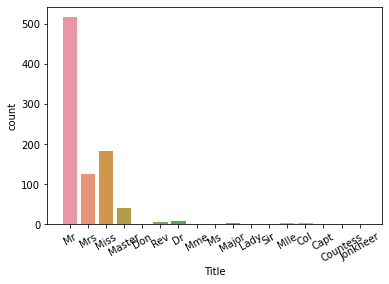

In [478]:
ax = sns.countplot(train['Title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.plot()

In [479]:
# replace uncommon titles with common ones
for row in combine:
    row['Title'] = row['Title']\
                    .replace(['Rev', 'Dr', 'Col', 'Jonkheer', 'Capt', 'Major'], 'Mr') \
                    .replace(['Jonkheer', 'Don', 'Sir', 'Master'], 'NobelM')\
                    .replace(['Miss', 'Mme', 'Mlle'], 'Ms')\
                    .replace(['Lady', 'Countess', 'Dona'], 'NobelF')

/Users/sunshah/miniconda/envs/ecommerce/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


[]

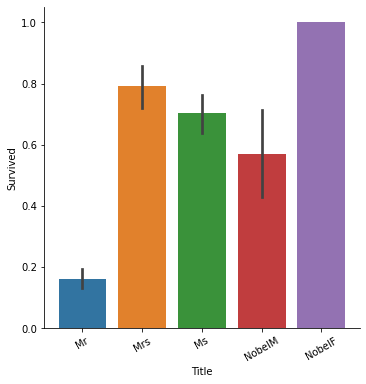

In [480]:
ax = sns.factorplot(data=train, x='Title', y='Survived', kind='bar', height=HEIGHT)
ax.set_xticklabels(rotation=30)
plt.plot()

In [481]:
# Convert categorical titel to ordinal manually
for row in combine:
    row['Title'] = row['Title'].replace(['Mr', 'Mrs', 'Ms', 'NobelM', 'NobelF'], ['1', '2', '2', '3', '4'])

### Family Size from Parch and SibSp
Combine parent/child and sibling/spouse information to get family size

In [482]:
for row in combine:
    row['FamilySize'] = row['Parch'] + row['SibSp']

### Age Bands from Age
Convert age to age bands

In [483]:
train['AgeBand'] = pd.cut(train['Age'], 5)
test['AgeBand'] = pd.cut(test['Age'], 5)
combine = [train, test]

In [484]:
# check average survival across the different age bands
train.groupby('AgeBand')['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
AgeBand,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.336714
"(32.252, 48.168]",0.412844
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


In [485]:
# replace age with ordinal values based on bands
for row in combine:
    row.loc[row['Age'] <= 16, 'Age'] = 0
    row.loc[(row['Age'] > 16) & (row['Age'] <= 32), 'Age'] = 1
    row.loc[(row['Age'] > 32) & (row['Age'] <= 48), 'Age'] = 2
    row.loc[(row['Age'] > 48) & (row['Age'] <= 64), 'Age'] = 3
    row.loc[row['Age'] > 64, 'Age'] = 4

### Fare Bands from Fare
Convert fare to fare bands

In [486]:
train['FareBand'] = pd.cut(train['Fare'], 4)
test['FareBand'] = pd.cut(test['Fare'], 4)

In [487]:
combine = [train, test]

In [488]:
# check average survival across fare bands
train.groupby(['FareBand'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
FareBand,
"(-0.512, 128.082]",0.368113
"(128.082, 256.165]",0.724138
"(256.165, 384.247]",0.666667
"(384.247, 512.329]",1.000000


In [489]:
# replace fare by ordinal values based on fare bands
for row in combine:
    row.loc[row['Fare'] <= 128, 'Fare' ] = 1
    row.loc[(row['Fare'] > 128) & (row['Fare'] <= 256), 'Fare' ] = 2
    row.loc[(row['Fare'] > 256) & (row['Fare'] <= 384), 'Fare' ] = 3
    row.loc[row['Fare'] > 384, 'Fare' ] = 4


### Gender to ordinal values

In [490]:
for row in combine:
    row['Sex'] = row['Sex'].map({'female': 0, 'male': 1}).astype(int)

### Embarked to ordinal values

In [491]:
for row in combine:
    row['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

In [492]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,AgeBand,FareBand
0,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,1.0,0,1,1,"(16.336, 32.252]","(-0.512, 128.082]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,1.0,1,2,1,"(32.252, 48.168]","(-0.512, 128.082]"
2,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,1.0,0,2,0,"(16.336, 32.252]","(-0.512, 128.082]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,1.0,0,2,1,"(32.252, 48.168]","(-0.512, 128.082]"
4,0,3,"Allen, Mr. William Henry",1,2.0,0,0,1.0,0,1,0,"(32.252, 48.168]","(-0.512, 128.082]"


In [493]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,AgeBand,FareBand
0,892,3,"Kelly, Mr. James",1,2.0,0,0,1.0,2,1,0,"(30.502, 45.668]","(-0.512, 128.082]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2.0,1,0,1.0,0,2,1,"(45.668, 60.834]","(-0.512, 128.082]"
2,894,2,"Myles, Mr. Thomas Francis",1,3.0,0,0,1.0,2,1,0,"(60.834, 76.0]","(-0.512, 128.082]"
3,895,3,"Wirz, Mr. Albert",1,1.0,0,0,1.0,0,1,0,"(15.336, 30.502]","(-0.512, 128.082]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1.0,1,1,1.0,0,2,2,"(15.336, 30.502]","(-0.512, 128.082]"


## Drop rows no longer required
Drop `Name`, `AgeBand`, `FareBand`

In [494]:
# drop name from train and test sets
train = train.drop(['Name', 'AgeBand', 'FareBand'], axis=1)
test = test.drop(['Name', 'AgeBand', 'FareBand'], axis=1)

In [495]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,1,1.0,1,0,1.0,0,1,1
1,1,1,0,2.0,1,0,1.0,1,2,1
2,1,3,0,1.0,0,0,1.0,0,2,0
3,1,1,0,2.0,1,0,1.0,0,2,1
4,0,3,1,2.0,0,0,1.0,0,1,0


In [496]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,892,3,1,2.0,0,0,1.0,2,1,0
1,893,3,0,2.0,1,0,1.0,0,2,1
2,894,2,1,3.0,0,0,1.0,2,1,0
3,895,3,1,1.0,0,0,1.0,0,1,0
4,896,3,0,1.0,1,1,1.0,0,2,2


## Model Training

### Test/Train Split

In [499]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,892,3,1,2.0,0,0,1.0,2,1,0
1,893,3,0,2.0,1,0,1.0,0,2,1
2,894,2,1,3.0,0,0,1.0,2,1,0
3,895,3,1,1.0,0,0,1.0,0,1,0
4,896,3,0,1.0,1,1,1.0,0,2,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1.0,0,0,1.0,0,1,0
414,1306,1,0,2.0,0,0,1.0,1,4,0
415,1307,3,1,2.0,0,0,1.0,0,1,0
416,1308,3,1,1.0,0,0,1.0,0,1,0


In [506]:
X_train = train.drop(['Survived'], axis=1)
y_train = train['Survived']
X_test = test.drop(['PassengerId'], axis=1).copy()

In [507]:
print(f'X_train.shape = {X_train.shape}; y_train.shape = {y_train.shape}; X_test.shape = {X_test.shape}')

X_train.shape = (891, 9); y_train.shape = (891,); X_test.shape = (418, 9)


### Classification Methods

    * Logistic Regression
    * Random Forest Regression
    * SVMs
    * KNN

#### Logistic Regression

In [543]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_predictions_lr = logistic_regression.predict(X_test)
logistic_regression_score = round(logistic_regression.score(X_train, y_train), 2)
coefficients_lr = zip(X_train.columns.values, logistic_regression.coef_[0])

In [544]:
print(f'Logistic Regression model has a score of {logistic_regression_score}')
print('Coefficient importance')
print('-'*50)
list(coefficients_lr)

Logistic Regression model has a score of 0.84
Coefficient importance
--------------------------------------------------


[('Pclass', -1.1884315500182818),
 ('Sex', -1.5200883042197595),
 ('Age', -0.4035364395069075),
 ('SibSp', -0.2647518601460085),
 ('Parch', 0.023964812543144573),
 ('Fare', 0.20122270151001478),
 ('Embarked', 0.17885655981731707),
 ('Title', 1.6246727314794265),
 ('FamilySize', -0.2407870476028654)]

#### Random Forest Regression

In [545]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_predictions_rf = random_forest.predict(X_test)
random_forest_score = round(random_forest.score(X_train, y_train), 2)
feature_importance_rf = zip(X_train.columns.values, random_forest.feature_importances_)

In [546]:
print(f'Random Forest Regression model has a score of {random_forest_score}')
print(f'Random Forest Feature Importances')
print('-'*50)
list(feature_importance_rf)

Random Forest Regression model has a score of 0.87
Random Forest Feature Importances
--------------------------------------------------


[('Pclass', 0.16200474931282918),
 ('Sex', 0.20176806655110435),
 ('Age', 0.08303440075946754),
 ('SibSp', 0.05278470237741165),
 ('Parch', 0.03688354117540162),
 ('Fare', 0.023265899831545374),
 ('Embarked', 0.056136068713178486),
 ('Title', 0.28657695849520276),
 ('FamilySize', 0.09754561278385908)]

#### SVMs

In [551]:
svc = LinearSVC(max_iter=10000)
svc.fit(X_train, y_train)
y_predictions_svc = svc.predict(X_test)
svc_score = round(svc.score(X_train, y_train), 2)
feature_coefficients_svm = zip(X_train.columns.values, svc.coef_[0])

In [552]:
print(f'SVM model has a score of {svc_score}')
print(f'SVM Feature Importances')
print('-'*50)
list(feature_coefficients_svm)

SVM model has a score of 0.84
SVM Feature Importances
--------------------------------------------------


[('Pclass', -0.36912358097475706),
 ('Sex', -0.590022919393666),
 ('Age', -0.12598401081021537),
 ('SibSp', -0.0988896744594011),
 ('Parch', 0.0016898275134342028),
 ('Fare', 0.10095291593108163),
 ('Embarked', 0.05467705454711947),
 ('Title', 0.6138455135696691),
 ('FamilySize', -0.09719984694596658)]